<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/logisticgslc1joe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
X_train = np.array([[0.08, 0.72], [0.26, 0.58], [0.45, 0.15], [0.60, 0.30],

       [0.10, 1.0], [0.35, 0.95], [0.70, 0.65], [0.92, 0.45]])

In [ ]:
y_train = np.array([1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
X_test = np.array([[0.10, 0.9], [0.4, 0.2], [0.8, 0.5], [0.2, 0.6]])

VISUAL THE DATA

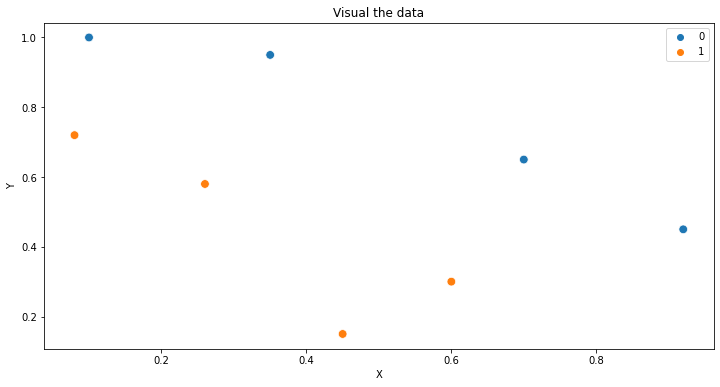

In [ ]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=75)

plt.title("Visual the data")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [ ]:
class gradientDescent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def sigmoid(self, y):
    res = 1/(1 + np.exp((-1)*y))
    return res

  def cross_entropy(self, y, y_pred):
    ent_result = -1 * sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return ent_result

  def predict(self, X, theta, intercept):
    y_raw = np.array(intercept + np.dot(X, theta))
    predict_result = self.sigmoid(y_raw)
    return predict_result

  def update_theta(self, X, y, y_pred, alpha):
    d_theta = np.dot((y_pred - y), X)
    update_TResult = self.theta - (alpha * d_theta)
    return update_TResult

  def update_intercept(self, y, y_pred, alpha):
    d_intercept = np.sum(y_pred - y)
    update_IResult = self.intercept - (alpha * d_intercept)
    return update_IResult

  def fit(self, X, y, epochs, alpha):
    loss = []
  
    for i in range(epochs):
      y_pred = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_pred, alpha)
      self.intercept = self.update_intercept(y, y_pred, alpha)
      loss.append(self.cross_entropy(y, y_pred))

    return loss


In [ ]:
all_loss = []

for alpha in [0.3, 0.6, 0.8]:
  model = gradientDescent(X_train.shape[1])
  epochs = 100000
  loss = model.fit(X_train, y_train, epochs, alpha)
  print(f'Rate: {alpha}')
  print(f'Intercept / bias: {model.intercept}')
  print(f'Theta / weight: {model.theta}')

  all_loss.append([alpha, loss])

Rate: 0.3
Intercept / bias: 42.8260908621411
Theta / weight: [-32.66442194 -46.32179571]
Rate: 0.6
Intercept / bias: 46.91908647649366
Theta / weight: [-35.71609149 -50.77250094]
Rate: 0.8
Intercept / bias: 48.62686255690646
Theta / weight: [-36.98797869 -52.62962977]


VIEW LOSS

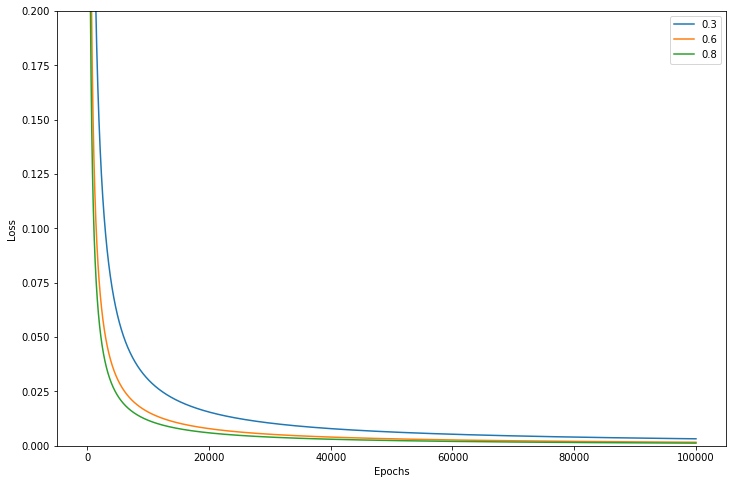

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.ylim([0, 0.2])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Berdasarkan chart loss diatas, alpha 0,8 memiliki nilai loss yang paling mendekati dengan 0

FINAL MODEL

buat model berdasarkan nilai alpha yang paling mendekati 0, yaitu 0,8

In [ ]:
model = gradientDescent(X_train.shape[1])
epochs = 100000
loss = model.fit(X_train, y_train, epochs, 0.8)

In [ ]:
intercept = model.intercept
print(intercept)

48.62694474636837


In [ ]:
theta = model.theta
print(theta)

[-36.98803989 -52.62971915]


gunakan threshold 0,5 untuk mengubah bentuk dari sigmoid menjadi peluang 0 atau 1

In [ ]:
def threshold(y):
  return [1 if i >= 0.5 else 0 for i in y]

DATA TRAINING (TRAIN)

In [ ]:
y_pred_raw = model.predict(X_train, theta, intercept)
y_pred = threshold(y_pred_raw)

In [ ]:
pd.DataFrame({'y_pred_raw': y_pred_raw, 'y_pred Class': y_pred})

,y_pred_raw,y_pred Class
0,9.995799e-01,1
1,9.997935e-01,1
2,1.000000e+00,1
3,9.999762e-01,1
4,4.519087e-04,0
5,6.055656e-07,0
6,1.039682e-05,0
7,1.132924e-04,0


Cost of data training (TRAIN)

In [ ]:
cost = model.cross_entropy(y_train, y_pred_raw)
print(f'Cost: {cost}')

Cost: 0.0012269140473864055


Boundary Decision Line

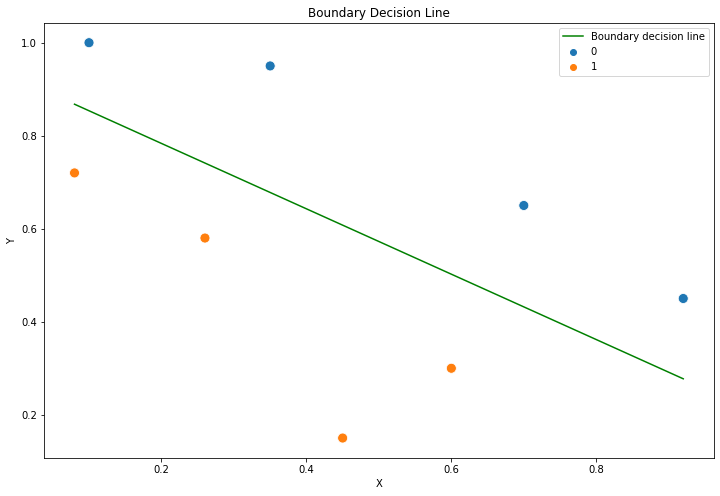

In [ ]:
plt.figure(figsize=(12, 8))

separator = (-1 * intercept / theta[1]) + ((-1 * theta[0]/theta[1]) * X_train[:, 0])

sns.lineplot(x=X_train[:, 0], y=separator, label='Boundary decision line', color='green')
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=100)

plt.title("Boundary Decision Line")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

DATA TRAINING (TEST)

In [ ]:
y_test_raw = model.predict(X_test, theta, intercept)
y_test_pred = threshold(y_test_raw)

In [ ]:
pd.DataFrame({'y_pred_raw': y_test_raw, 'y_pred Class': y_test_pred})

,y_pred_raw,y_pred Class
0,0.080276,0
1,1.000000,1
2,0.000690,0
3,0.999936,1


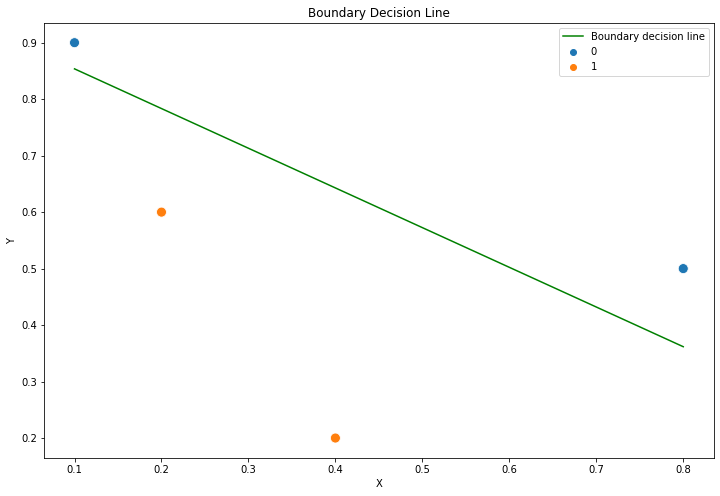

In [ ]:
plt.figure(figsize=(12, 8))

separator = (-1 * intercept / theta[1]) + ((-1 * theta[0]/theta[1]) * X_test[:, 0])

sns.lineplot(x=X_test[:, 0], y=separator, label='Boundary decision line', color='green')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test_pred, s=100)

plt.title("Boundary Decision Line")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()